In [1]:
"""
Exploratory Data Analysis
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import sys
import random
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
random.seed(20241017)
np.random.seed(20241017)
torch.manual_seed(3407) # Torch.manual_seed(3407) is all you need. Paper: http://arxiv.org/abs/2109.08203

# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [2]:
data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

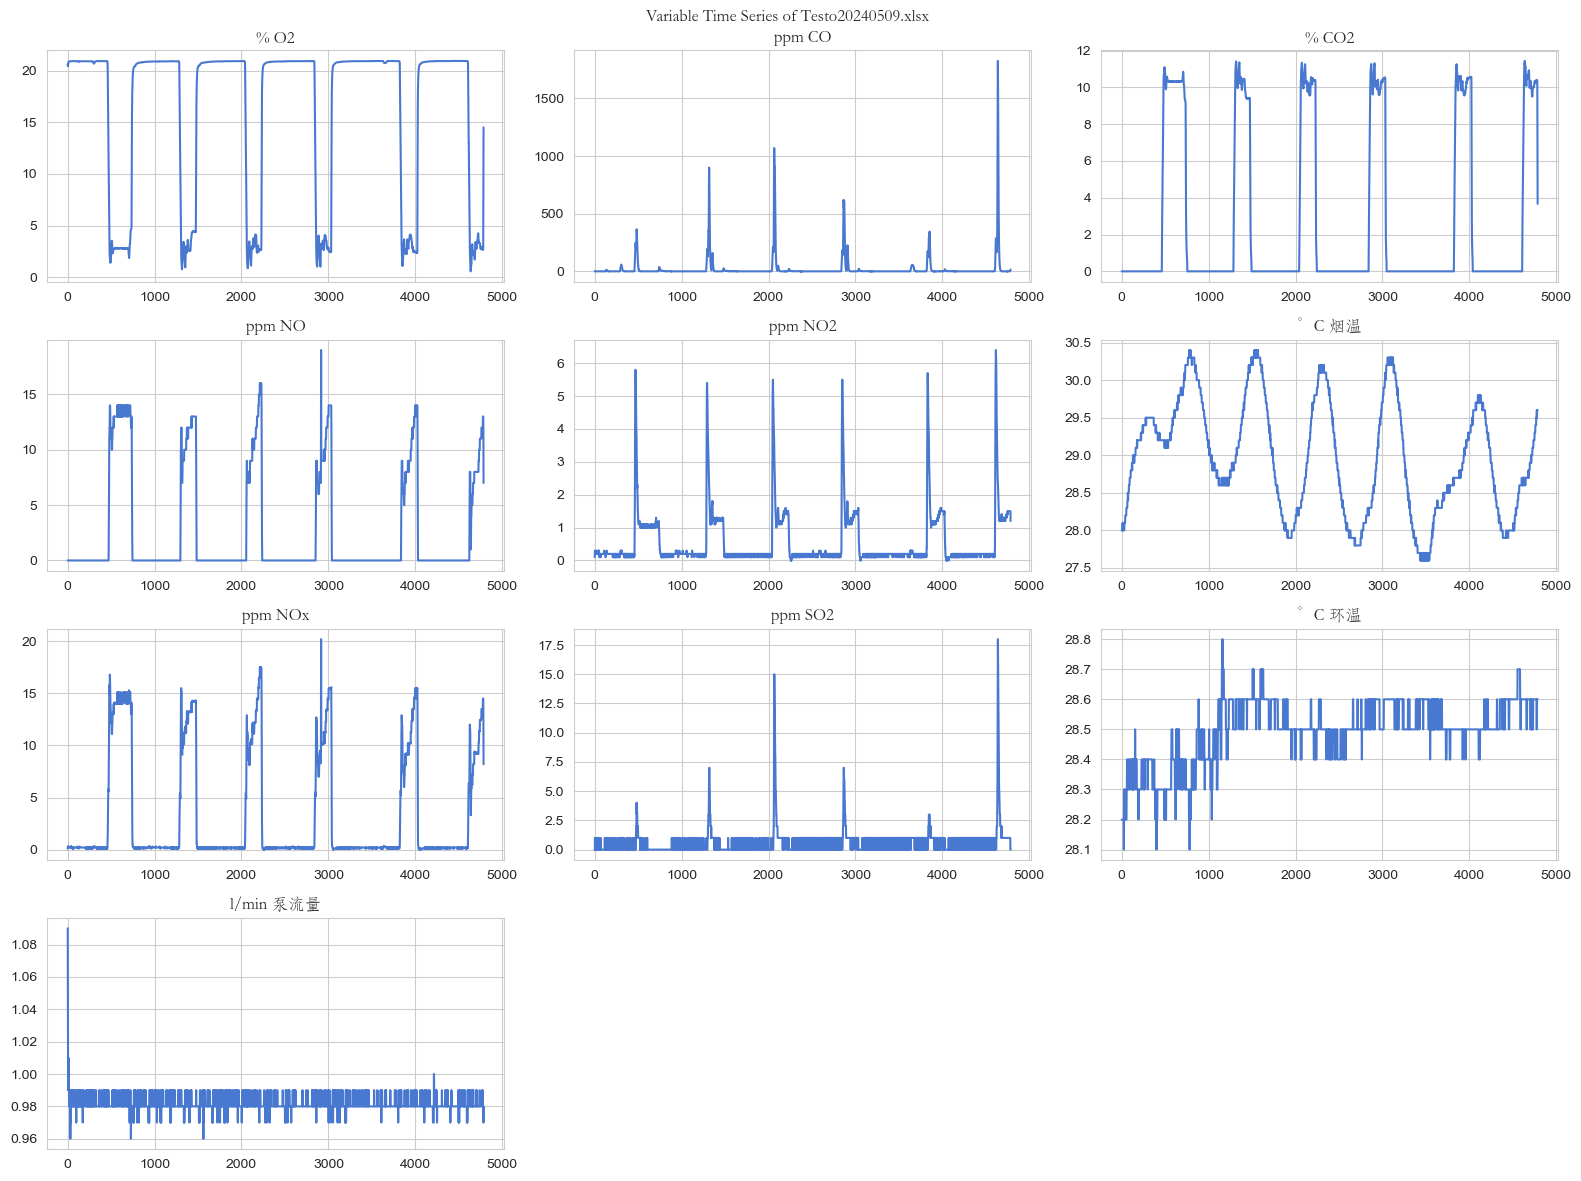

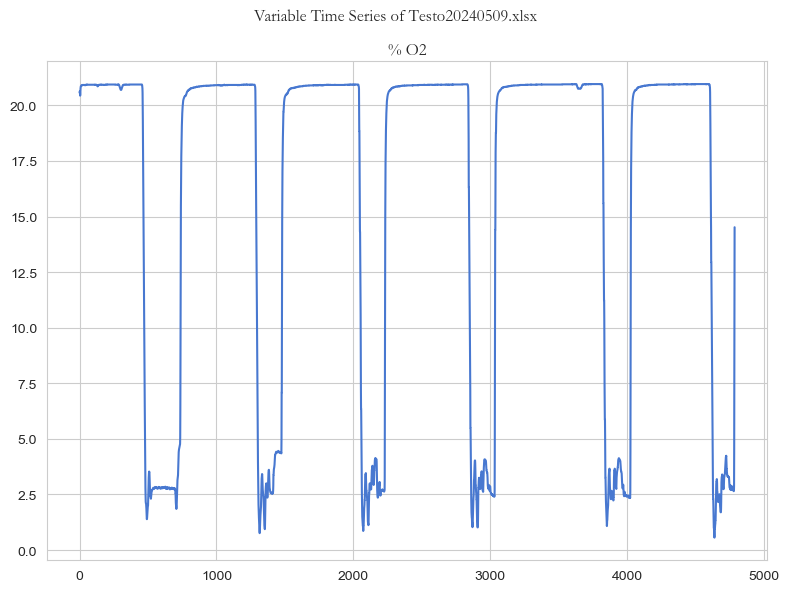

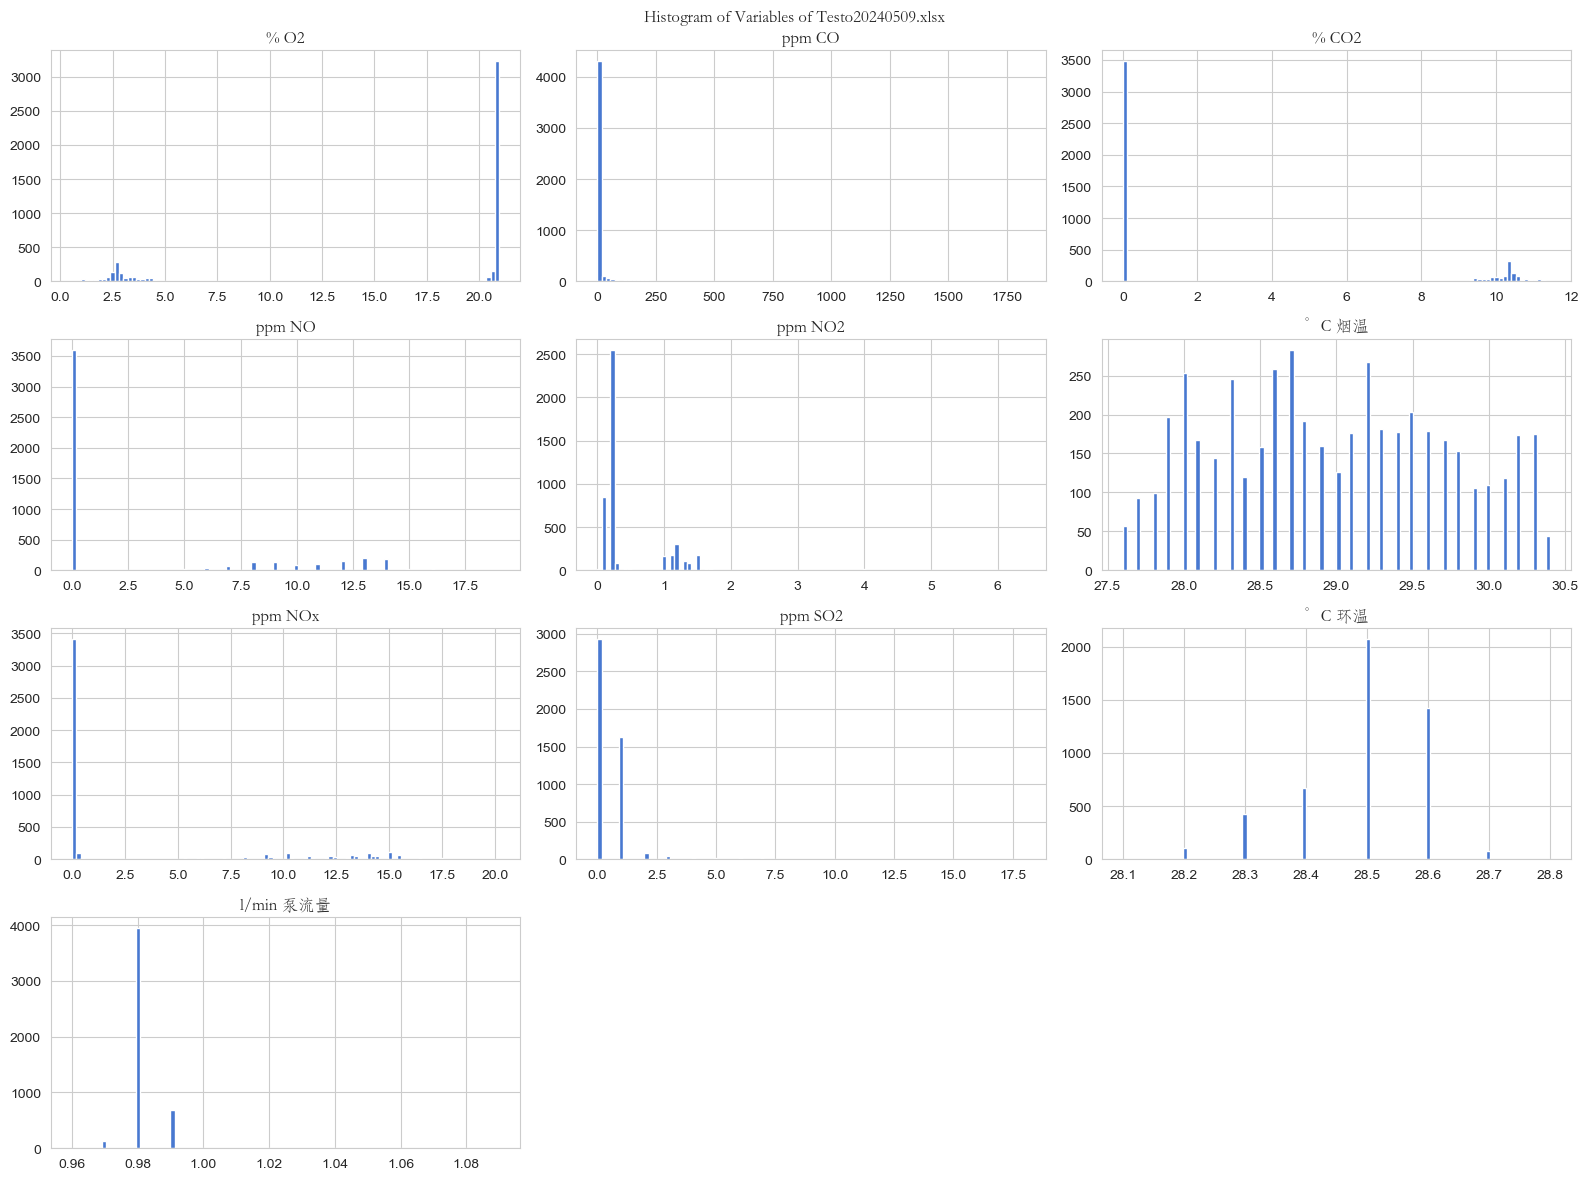

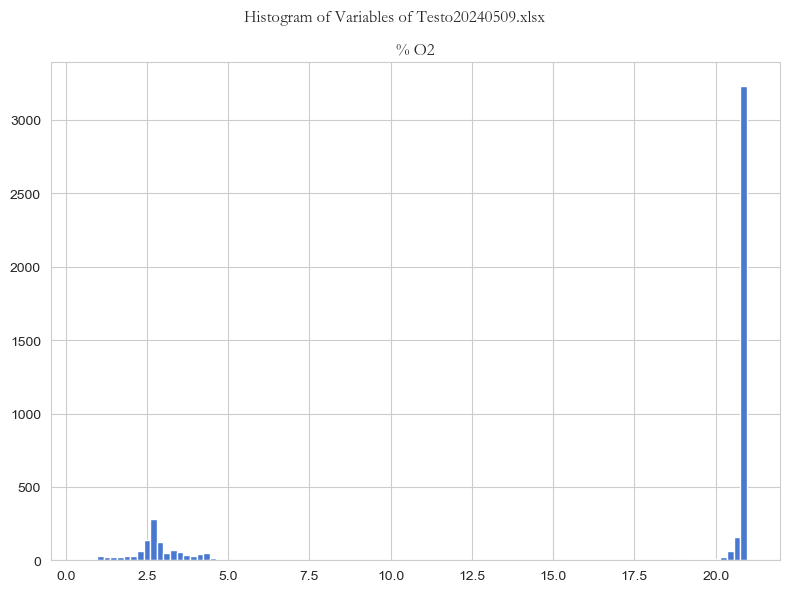

In [3]:
from gas_data_prediction.EDA import plot_file, plot_var, hist_file, hist_var
plot_file(data_paths[0], var_names=var_names)
plot_var(data_paths[0], var_name='% O2')
hist_file(data_paths[0], var_names=var_names, bins=100)
hist_var(data_paths[0], var_name='% O2', bins=100)

In [4]:
df=pd.concat([
            pd.read_excel(data_paths[i])[["日期／时间"]+var_names]
                for i in range(len(data_paths))
            ])
display(df.head())
display(df.info())
display(df.describe())

,日期／时间,% O2,ppm CO,% CO2,ppm NO,ppm NO2,°C 烟温,ppm NOx,ppm SO2,°C 环温,l/min 泵流量
0,2024-05-09 15:30:24,20.57,0,-,0,0.1,28.0,0.1,0,28.2,1.09
1,2024-05-09 15:30:25,20.63,0,-,0,0.2,28.0,0.2,0,28.2,1.09
2,2024-05-09 15:30:26,20.63,0,-,0,0.3,28.0,0.3,0,28.2,1.04
3,2024-05-09 15:30:27,20.58,0,-,0,0.3,28.0,0.3,1,28.2,1.04
4,2024-05-09 15:30:28,20.44,1,-,0,0.3,28.0,0.3,0,28.2,1.01


<class 'pandas.core.frame.DataFrame'>
Index: 28711 entries, 0 to 7759
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   日期／时间      28711 non-null  datetime64[ns]
 1   % O2       28711 non-null  float64       
 2   ppm CO     28711 non-null  int64         
 3   % CO2      28711 non-null  object        
 4   ppm NO     28711 non-null  int64         
 5   ppm NO2    28711 non-null  float64       
 6   °C 烟温      28711 non-null  object        
 7   ppm NOx    28711 non-null  float64       
 8   ppm SO2    28711 non-null  int64         
 9   °C 环温      28711 non-null  float64       
 10  l/min 泵流量  28711 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 2.6+ MB


None

,日期／时间,% O2,ppm CO,ppm NO,ppm NO2,ppm NOx,ppm SO2,°C 环温,l/min 泵流量
count,28711,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000
mean,2024-05-13 04:24:17.068858624,15.613160,55.237331,4.531991,0.795601,5.327592,1.360524,28.095455,0.982312
min,2024-05-09 15:30:24,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,25.400000,0.320000
25%,2024-05-11 14:46:17.500000,4.660000,0.000000,0.000000,0.300000,0.300000,0.000000,27.200000,0.980000
50%,2024-05-14 14:44:20,20.840000,1.000000,0.000000,0.400000,0.400000,1.000000,28.000000,0.980000
75%,2024-05-15 14:20:39.500000,20.910000,3.000000,10.000000,1.400000,12.200000,1.000000,28.600000,0.990000
max,2024-05-15 16:20:17,20.980000,10441.000000,27.000000,8.400000,29.000000,218.000000,31.300000,1.240000
std,NaN,8.013602,394.865106,7.486168,0.956886,8.070523,8.039027,1.330979,0.024779
